In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
videos = pd.read_csv('/Volumes/NO NAME/Data Analytics Project -Python/1-Youtube Text Data Analysis/UScomments.csv',error_bad_lines=False) 
# Preview the first 5 lines of the loaded data 
videos.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/jaylenebautista/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [3]:
!pip install textblob

In [4]:
from textblob import TextBlob

#TextBlob is a Python 3 library for processing textual data. 
#It provides a simple API for diving into common natural language processing (NLP) tasks such as:
#part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [5]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity
#polarity tells us if the comment is positive or negative. In this case it is neutral 

0.0

In [11]:
polarity=[]
for i in videos['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
            polarity.append(0) 

In [7]:
videos['polarity']=polarity

In [8]:
videos.head(20)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [9]:
#Exploratory Data Analysis for the positive sentences. 
comments_positive=videos[videos['polarity']==1] #Polarity=1 means positive filter
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [12]:
#use wordcloud to show which words are repeated the most.
!pip install wordcloud

     |████████████████████████████████| 162 kB 2.1 MB/s eta 0:00:01


In [13]:
from wordcloud import WordCloud,STOPWORDS   #STOPWORDS removes repeated words

In [14]:
total_comments=(''.join(comments_positive['comment_text']))
len(total_comments)

827161

(-0.5, 999.5, 499.5, -0.5)

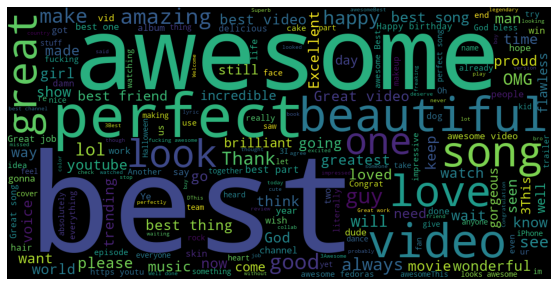

In [16]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [17]:
#EDA for negative comments 
comments_negative=videos[videos['polarity']==-1]
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [19]:
total_comments=(''.join(comments_negative['comment_text']))
len(total_comments)

187280

(-0.5, 999.5, 499.5, -0.5)

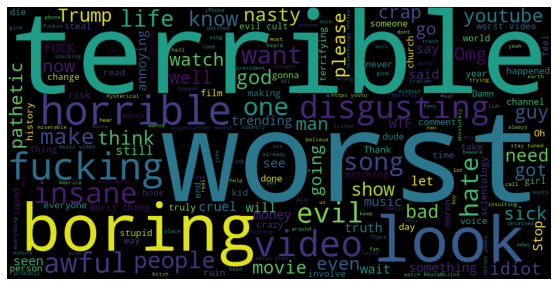

In [20]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')